# Lab 5: Optimization algorithms

In statistical analysis, it often requires to maximize or minimize a target function $f(x)$ with respect to $x$. For example, if the likelihood function $L(\theta)=P(D|\theta)$ is given, the maximum likelihood estimate of $\theta$ is obtained by maximizing the likelihood function 
$L(\theta)$. For the least square estimates, when the error function is given, we estimate parameters by minimizing the sum of squared errors. In mathematics, those problems are called optimization problems, which may not have analytic solutions. 

If the likelihood function or the error function is continuous and differentiable with respect to $\theta$, then the optimizer is the solution to the equation  

$$\frac{dL(\theta)}{d\theta}=0$$
 
````{prf:example} 
:nonumber:
$x_1,\dots,x_n\sim Exponential (\lambda)$ and we want to find the maximum likelihood estimate of $\lambda$. The likelihood function is given by  


$$L(\lambda)=f(x_1,\dots,x_n|\lambda)=\prod_{i=1}^nf(x_i|\lambda)=\prod_{i=1}^n\frac{1}{\lambda}e^{-\frac{x_i}{\lambda}}=\frac{1}{\lambda^n}e^{−\frac{\sum_ix_i}{\lambda}}$$

The loglikelihood function is given by

$$logL(\lambda)=−n\log\lambda−\frac{\sum_ix_i}{\lambda}$$

 
Setting the first derivate of the loglikelihood function to be 0,

$$−\frac{n}{\lambda}+\frac{\sum_ix_i}{\lambda^2}=0 \Rightarrow \lambda=\bar{x}$$
````
 
What if there is no analytic solution? We may use numerical approaches to solve optimization problems.  

 
## Newton-Raphson algorithms  
If $g(x)$ is a differentiable function, we want to find the solution $x^∗$ such that 
$g(x^∗)=0$. When $x$ is close to $x^∗$, we have the following approximation  

$$\frac{g(x)−g(x^∗)}{x−x^∗}\approx g'(x)$$

The Newton-Raphson algorithm uses a recursive function to iteratively update the value of $x$,

$$x^∗=x−\frac{g(x)}{g'(x)}$$

```{prf:algorithm} Newton-Raphson
:label: Newton

**Inputs** Given a target function $G=(x)$ with or without constraints, its derivative $g'(x)$, and a small $\epsilon$.

**Output** the maximum or minimum value.

1. Set an initial value $x_0$
2. Update $x_{n+1} = x_n - \frac{g(x_n)}{g'(x_n)}$
3. Stop if $|x_{n+1}-x_n|<\epsilon$

```

We may use the NR algorithm to calculate $\sqrt{2}$. This is equivalent to finding the solution to the equation $x^2 - 2 = 0$.

In [1]:
epsilon = 1e-5
error = 1
x_old = 2
while(error > epsilon){
    x = x_old - (x_old^2-2)/(2*x_old)
    error = abs(x-x_old)
    x_old = x
}
print(paste("the squre root of 2 is", x))
print(paste("the error is", error))

[1] "the squre root of 2 is 1.41421356237469"


[1] "the error is 2.12389982001682e-06"


We may generalize this algorithm to calculate the square root of any positive number $a$.

In [2]:
my_sqrt = function (a){
    epsilon = 1e-5
    error = 1
    x_old = a
    while(error > epsilon){
        x = x_old - (x_old^2-a)/(2*x_old)
        error = abs(x-x_old)
        x_old = x
    }
    return(c(x,error))
}

a = 9
result = my_sqrt(a)
print(paste("the squre root of", a, "is", result[1]))
print(paste("the error is", result[2]))

[1] "the squre root of 9 is 3"


[1] "the error is 1.39698386192322e-09"


## Optimization in R
Generate 10 random numbers from the exponential distribution with $\lambda=1/3$ and find the maximum likelihood estimate of $\lambda$. We plot the loglikelihood as a function of $\lambda$.

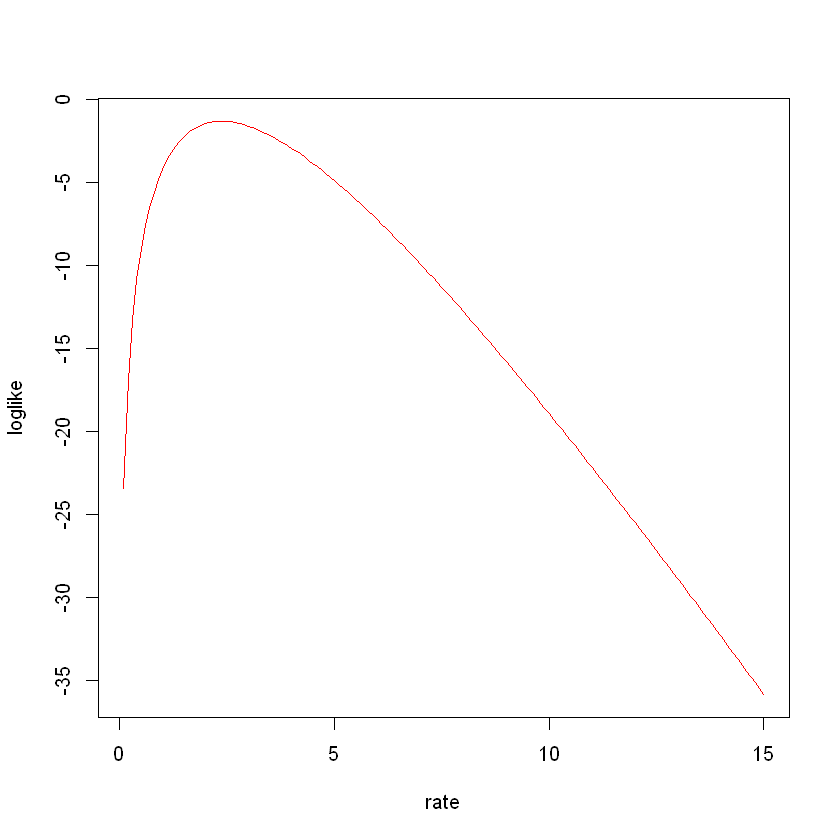

In [3]:
n = 10
data = rexp(n, rate=3) #rate = 1/lambda
x = sum(data)
rate = seq(0.1,15,0.1)

loglike = 1:length(rate)
for(i in 1:length(rate)){
    loglike[i] = sum(log(dexp(data,rate[i])))
}
plot(rate,loglike,type="l",col="red")

In theory, the MLE of $\lambda$ is the sample average. Here, we use the optimization function **optim()** to find the MLE of $\lambda$ in R.

In [4]:
#the optimization funciton optim minimizes a target function
#therefore, we calculate -loglike
loglikelihood = function(x, data){
    loglike = sum(log(dexp(data,x)))
    -loglike 
}

result = optim(par = 1, fn = loglikelihood, data = data)
print(paste("the maximum likelihood estimate of lambda is", 1/result$par))
print(paste("the sample average is", mean(data)))

Warning message in optim(par = 1, fn = loglikelihood, data = data):
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"


[1] "the maximum likelihood estimate of lambda is 0.419672131147541"


[1] "the sample average is 0.419734918982615"
